In [86]:
%pylab inline  
import GPy
import GPyOpt
from numpy.random import seed
import matplotlib
import matplotlib.pyplot as plt
import os

Populating the interactive namespace from numpy and matplotlib


In [87]:
def myf(x):
    """The function to predict."""
    return (2*((x-3)*np.sin((x-3))) + 2 + 0.5*x)

In [88]:
bounds = [{'name': 'var_1', 'type': 'continuous', 'domain': (0,6)}]

In [89]:
# acquisition_type = "MPI"
# eps = 0

In [90]:
init_x = np.array([[0.5]])
init_y = myf(init_x)

In [91]:
np.random.seed(89)

In [92]:
GPyOpt.methods.BayesianOptimization??

In [93]:
acquisition_type = 'EI'
eps =0
num = 10
np.random.seed(89)
myProble = GPyOpt.methods.BayesianOptimization(
    myf,
    bounds, 
    acquisition_type=acquisition_type,
    initial_design_numdata = 0,
    X = init_x,
    Y = init_y,
    exact_feval = True,
    maximize=True,
)
myProblem.acquisition.jitter = eps

myProblem.run_optimization(max_time=-1)

#         dirName = f"MAB_pngs/gpyopt/{acquisition_type}"
#         os.makedirs(dirName, exist_ok=True)
#             myProblem.plot_acquisition(f"{dirName}/{eps}_{ix}.png")
#         x = np.linspace(0, 6, 600)

#         for ix, x_ in enumerate(myProblem.X):
#             plt.plot(x, -myf(x))
#             for i in range(ix):
#                 plt.scatter(myProblem.X[i], -myf(myProblem.X[i]), c='r')
#             plt.scatter(x_, -myf(x_))
#             plt.title(f'{acquisition_type} {ix} {eps}')
#             dirName = f"MAB_pngs/gpyopt/{acquisition_type}"
#             os.makedirs(dirName, exist_ok=True)
#             plt.savefig(f"{dirName}/{eps}_{ix}.png")
#             plt.close()
        # a.savefig()
        # plt.close()


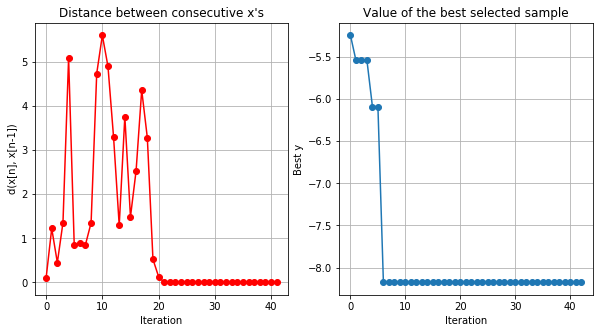

In [94]:
myProblem.plot_convergence()

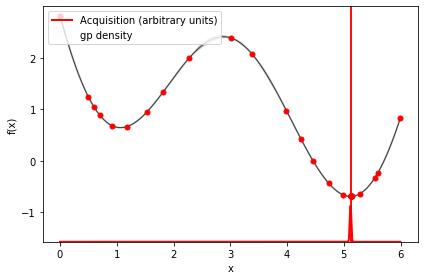

In [96]:
myProblem.plot_acquisition()

In [62]:
bounds = myProblem.acquisition.space.get_bounds()

In [63]:
x_grid = np.arange( bounds[0][0], bounds[0][1], 0.001)
x_grid = x_grid.reshape(len(x_grid),1)
acqu = myProblem.acquisition.acquisition_function(x_grid)

In [64]:
myProblem.plot_acquisition??

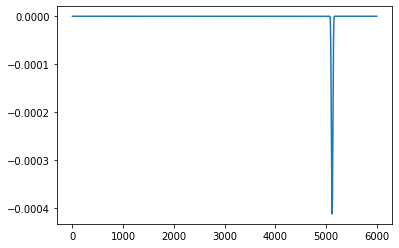

In [65]:
plt.plot(acqu)

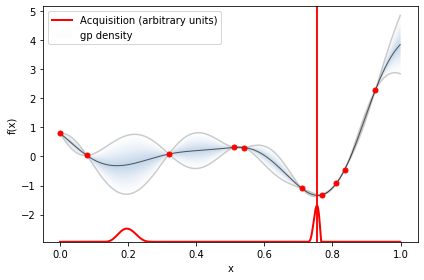

In [78]:
# --- Load GPyOpt
from GPyOpt.methods import BayesianOptimization
import numpy as np

# --- Define your problem
def f(x): return (6*x-2)**2*np.sin(12*x-4)
domain = [{'name': 'var_1', 'type': 'continuous', 'domain': (0,1)}]

# --- Solve your problem
myBopt = BayesianOptimization(f=f, domain=domain)
myBopt.run_optimization(max_iter=5)
myBopt.plot_acquisition()

In [ ]:
myBopt.